In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
#from sklearn.ensemble import GradientBoostingRegressor
#from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
#from sklearn.model_selection import cross_val_score, KFold


In [2]:
#reading files
train_data = pd.read_csv("../data/raw/cars.csv.zip")
test_data = pd.read_csv("../data/raw/cars_test.csv")

In [3]:
#check for duplicates
if len(train_data.id.unique()) < len(train_data.index):
        print('hmm, it seems to me that there\'re duplicates')
else:
    print('there\'re no duplicates')

there're no duplicates


In [4]:
#visualising percent of missing data in test and train samples
percent_missing_train = (train_data.isna().sum() * 100 / len(train_data)).round(2)
percent_missing_test = (test_data.isna().sum() * 100 / len(test_data)).round(2)

missing_value_df = pd.DataFrame({'percent_missing_train_data': percent_missing_train,
                                'percent_missing_test_data': percent_missing_test})
missing_value_df 

,percent_missing_train_data,percent_missing_test_data
brand,0.00,0.00
engineSize,0.00,0.00
fuelType,0.00,0.00
id,0.00,0.00
mileage,0.00,0.00
model,0.00,0.00
mpg,8.61,8.67
price,0.00,NaN
tax,13.12,12.88
tax(£),95.50,95.79


# General data preprocessing

In [5]:
#defining limits for 'years' in train data, excluding outliers
year_min = test_data['year'].min() 
train_data.drop(train_data[(train_data['year']< year_min)| (train_data['year']>2021)].index, inplace = True)
test_data.drop (test_data[(test_data['year']>2021)].index, inplace = True)

In [6]:
#creating dictionary of unique values in  train data
dict_train = dict()
dict_train['unique_brands'] = set((train_data['brand']))
dict_train['unique_models'] = set((train_data['model']))
dict_train['unique_fuel_types'] = list((set((train_data['fuelType']))))
dict_train['unique_transmission_types'] = list((set((train_data['transmission']))))
dict_train

{'unique_brands': {'Hyundai',
  'Mercedes-Benz',
  'audi',
  'bmw',
  'ford',
  'skoda',
  'toyota',
  'vauxhall',
  'vw'},
 'unique_models': {' 1 Series',
  ' 2 Series',
  ' 3 Series',
  ' 4 Series',
  ' 5 Series',
  ' 6 Series',
  ' 7 Series',
  ' 8 Series',
  ' A Class',
  ' A1',
  ' A2',
  ' A3',
  ' A4',
  ' A5',
  ' A6',
  ' A7',
  ' A8',
  ' Accent',
  ' Adam',
  ' Agila',
  ' Amarok',
  ' Amica',
  ' Ampera',
  ' Antara',
  ' Arteon',
  ' Astra',
  ' Auris',
  ' Avensis',
  ' Aygo',
  ' B Class',
  ' B-MAX',
  ' Beetle',
  ' C Class',
  ' C-HR',
  ' C-MAX',
  ' CC',
  ' CL Class',
  ' CLA Class',
  ' CLC Class',
  ' CLK',
  ' CLS Class',
  ' Caddy',
  ' Caddy Life',
  ' Caddy Maxi',
  ' Caddy Maxi Life',
  ' California',
  ' Camry',
  ' Caravelle',
  ' Cascada',
  ' Citigo',
  ' Combo Life',
  ' Corolla',
  ' Corsa',
  ' Crossland X',
  ' E Class',
  ' EcoSport',
  ' Edge',
  ' Eos',
  ' Escort',
  ' Fabia',
  ' Fiesta',
  ' Focus',
  ' Fox',
  ' Fusion',
  ' G Class',
  ' GL C

In [7]:
#creating dictionary of unique values in  test data
dict_test = dict()
dict_test['unique_brands'] = set((test_data['brand']))
dict_test['unique_models'] = set((test_data['model']))
dict_test['unique_fuel_types'] = set((test_data['fuelType']))
dict_test['unique_transmission_types'] = set((test_data['transmission']))
dict_test

{'unique_brands': {'Hyundai',
  'Mercedes-Benz',
  'audi',
  'bmw',
  'focus',
  'ford',
  'skoda',
  'toyota',
  'vauxhall',
  'vw'},
 'unique_models': {' 1 Series',
  ' 2 Series',
  ' 3 Series',
  ' 4 Series',
  ' 5 Series',
  ' 6 Series',
  ' 7 Series',
  ' 8 Series',
  ' A Class',
  ' A1',
  ' A3',
  ' A4',
  ' A5',
  ' A6',
  ' A7',
  ' A8',
  ' Adam',
  ' Agila',
  ' Amarok',
  ' Antara',
  ' Arteon',
  ' Astra',
  ' Auris',
  ' Avensis',
  ' Aygo',
  ' B Class',
  ' B-MAX',
  ' Beetle',
  ' C Class',
  ' C-HR',
  ' C-MAX',
  ' CC',
  ' CL Class',
  ' CLA Class',
  ' CLS Class',
  ' Caddy Life',
  ' Caddy Maxi Life',
  ' California',
  ' Caravelle',
  ' Citigo',
  ' Combo Life',
  ' Corolla',
  ' Corsa',
  ' Crossland X',
  ' E Class',
  ' EcoSport',
  ' Edge',
  ' Fabia',
  ' Fiesta',
  ' Focus',
  ' Fusion',
  ' G Class',
  ' GL Class',
  ' GLA Class',
  ' GLB Class',
  ' GLC Class',
  ' GLE Class',
  ' GLS Class',
  ' GT86',
  ' GTC',
  ' Galaxy',
  ' Golf',
  ' Golf SV',
  ' 

In [14]:
#ranking brands depending on their average price
mean_brand = []
list_brands = list((dict_train['unique_brands']))
for i in list_brands:
    mean =round(np.mean(train_data.loc[train_data.brand == i]['price']),2)
    mean_brand.append(mean)
df0 = pd.DataFrame({'brands':list_brands, 'mean prices':mean_brand})
df1 = df0.sort_values("mean prices")
df1

,brands,mean prices
3,vauxhall,10412.01
7,toyota,12509.40
6,ford,12597.66
1,Hyundai,12747.84
0,skoda,14250.14
2,vw,16832.89
4,bmw,22765.31
8,audi,22904.24
5,Mercedes-Benz,24417.14


In [16]:
#ranking transmission types on their average price
mean_transmission = []
list_transmission = list((dict_train['unique_transmission_types']))
for i in list_transmission:
    mean =round(np.mean(train_data.loc[train_data.transmission== i]['price']),2)
    mean_transmission.append(mean)
df0 = pd.DataFrame({'transmission':list_transmission, 'mean prices':mean_transmission})
df1 = df0.sort_values("mean prices")
df1

,transmission,mean prices
1,Manual,12205.26
2,Other,15796.70
3,Automatic,21490.19
0,Semi-Auto,24272.69


In [17]:
#excluding undefined fuel and transmission data types from dictionary
unique_fuel_types = dict_train['unique_fuel_types']
unique_fuel_types.remove("Other")
unique_fuel_types = set((unique_fuel_types))
unique_transmission_types = dict_train['unique_transmission_types']
unique_transmission_types.remove("Other")
unique_transmission_types = set((unique_transmission_types))

In [18]:
dict_train['unique_brands']

{'Hyundai',
 'Mercedes-Benz',
 'audi',
 'bmw',
 'ford',
 'skoda',
 'toyota',
 'vauxhall',
 'vw'}

In [19]:
#replacing incorrect or new brands in test data by brand with average price
for i in range(len(test_data.brand)):
    if test_data.brand[i] not in dict_train['unique_brands']:
        test_data.brand[i]= test_data.brand[i].replace(test_data.brand[i],'Hyundai')


<ipython-input-19-92a5c9ad6747>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.brand[i]= test_data.brand[i].replace(test_data.brand[i],'Hyundai')


In [20]:
#type(train_data.transmission[1])

In [21]:
#replacing undefined fuel type or transmission type depending on which defined type has the closest price 
#to the Other type in train data 
train_data.transmission = train_data.transmission.replace(to_replace = 'Other',value ='Manual')
test_data.transmission = test_data.transmission.replace(to_replace = 'Other',value ='Manual') 
train_data.fuelType = train_data.fuelType.replace(to_replace = 'Other',value ='Electric')
test_data.fuelType = test_data.fuelType.replace(to_replace = 'Other',value ='Electric') 

In [22]:
#checkin if replacing has been performed correctly
code_test = train_data.loc[train_data.fuelType == 'Other']
code_test 

,id,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),price


In [23]:
#calculating age of cars, replacing undefined values
train_data['age4M'] = 2021 - train_data['year']
train_data['age4M'].fillna(round(train_data['age4M'].mean(),0), inplace=True)
test_data['age4M'] = 2021 - test_data['year']

In [24]:
#transforming train data
train_data1 = pd.concat([train_data, pd.get_dummies(train_data['transmission'], 
                                                    columns = unique_transmission_types, 
                                                    prefix="transmission"),  
                      pd.get_dummies(train_data['fuelType'], 
                                     columns = unique_fuel_types, 
                                     prefix="fuelType"), 
                         pd.get_dummies(train_data['brand'], 
                                        prefix="brand")],  axis=1)

In [25]:
#transforming test data
test_data1 = pd.concat([test_data, pd.get_dummies(test_data['transmission'],  
                                                  columns = unique_transmission_types, 
                                                  prefix="transmission"),  
                      pd.get_dummies(test_data['fuelType'], 
                                     columns = unique_fuel_types, 
                                     prefix="fuelType"), 
                        pd.get_dummies(test_data['brand'], 
                                       prefix="brand")],  axis=1) 
                     

In [26]:
#dict_train['unique_fuel_types']

In [27]:
#deleting unnecessary columns in train data
train_data1.drop(['transmission', 'fuelType', 'tax(£)', 'model', 'year', 'tax', 'brand', 'id'], axis=1, inplace=True)

In [28]:
#deleting unnecessary columns in test data
test_data1.drop(['transmission', 'fuelType', 'tax(£)', 'model', 'year', 'tax', 'brand', 'id'], axis=1, inplace=True)

In [29]:
train_data1.columns

Index(['mileage', 'mpg', 'engineSize', 'price', 'age4M',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Petrol', 'brand_Hyundai',
       'brand_Mercedes-Benz', 'brand_audi', 'brand_bmw', 'brand_ford',
       'brand_skoda', 'brand_toyota', 'brand_vauxhall', 'brand_vw'],
      dtype='object')

In [30]:
test_data1.columns

Index(['mileage', 'mpg', 'engineSize', 'age4M', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol',
       'brand_Hyundai', 'brand_Mercedes-Benz', 'brand_audi', 'brand_bmw',
       'brand_ford', 'brand_skoda', 'brand_toyota', 'brand_vauxhall',
       'brand_vw'],
      dtype='object')

In [31]:
test_data1.shape

(9605, 20)

In [32]:
#filling undefined mpg values in train and test data
train_data1['mpg'] = train_data1['mpg'].fillna(train_data1.mpg.mean())
test_data1['mpg'] = test_data1['mpg'].fillna(test_data1.mpg.mean())

In [33]:
#filling zero engine size data in train and test data
train_mean = train_data1[train_data1.engineSize.notna()].engineSize.mean()
test_mean = test_data1[test_data1.engineSize.notna()].engineSize.mean()
train_data1['engineSize'] = train_data1['engineSize'].replace(0,np.NaN)
train_data1['engineSize'] = train_data1['engineSize'].fillna(train_mean)
test_data1['engineSize'] = test_data1['engineSize'].replace(0,np.NaN)
test_data1['engineSize'] = test_data1['engineSize'].fillna(test_mean) 

# Training model

In [34]:
#creating set of data for model training
x_f = train_data1.drop(columns=['price'])
y_f = train_data1['price']

In [35]:
#split train data
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, test_size=0.1, random_state=42)

In [36]:
#scaling training and test data
ss = StandardScaler()
x_train_f_scaled = ss.fit_transform(x_train_f)
x_test_f_scaled = ss.transform(x_test_f)
X_test_scaled = ss.transform(test_data1)

In [37]:
pd.DataFrame(x_train_f_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.041390,0.014007,-0.122004,-0.898925,-0.509260,0.879953,-0.547255,1.182553,-0.048854,-0.176402,-1.106662,-0.216826,-0.432949,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,-0.379251,2.480814
1,-0.335856,-1.765245,1.513447,-0.898925,1.963634,-1.136425,-0.547255,1.182553,-0.048854,-0.176402,-1.106662,4.611983,-0.432949,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,-0.379251,-0.403093
2,-0.226436,1.514033,-0.303721,0.518665,-0.509260,0.879953,-0.547255,1.182553,-0.048854,-0.176402,-1.106662,-0.216826,-0.432949,-0.328892,-0.331736,1.911435,-0.247417,-0.257981,-0.379251,-0.403093
3,0.292730,0.682849,-0.122004,0.991195,-0.509260,0.879953,-0.547255,1.182553,-0.048854,-0.176402,-1.106662,-0.216826,-0.432949,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,2.636773,-0.403093
4,-0.701077,0.085437,-1.212304,-0.898925,-0.509260,0.879953,-0.547255,-0.845628,-0.048854,-0.176402,0.903618,-0.216826,-0.432949,-0.328892,-0.331736,-0.523167,-0.247417,3.876258,-0.379251,-0.403093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89032,-0.532906,-0.473015,-0.667154,-0.898925,-0.509260,-1.136425,1.827303,-0.845628,-0.048854,-0.176402,0.903618,-0.216826,2.309740,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,-0.379251,-0.403093
89033,-0.124059,0.319207,-1.212304,0.518665,-0.509260,0.879953,-0.547255,-0.845628,-0.048854,-0.176402,0.903618,-0.216826,-0.432949,-0.328892,-0.331736,1.911435,-0.247417,-0.257981,-0.379251,-0.403093
89034,-0.672860,-1.453551,4.239198,0.046135,-0.509260,-1.136425,1.827303,-0.845628,-0.048854,-0.176402,0.903618,-0.216826,2.309740,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,-0.379251,-0.403093
89035,1.035840,0.156866,0.604863,1.936254,-0.509260,0.879953,-0.547255,-0.845628,-0.048854,-0.176402,0.903618,-0.216826,-0.432949,-0.328892,-0.331736,-0.523167,-0.247417,-0.257981,2.636773,-0.403093


In [38]:
#defining xgbr
xgbr = xgb.XGBRegressor(verbosity=0) 

In [39]:
#fitting model
xgbr.fit(x_train_f_scaled, y_train_f)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [40]:
#calculating score for train data
score = xgbr.score(x_train_f_scaled, y_train_f)  

print("Training score: ", score)

Training score:  0.9570096095910697


In [41]:
#predicting valuesfor validation set 
y_pred6= xgbr.predict(x_test_f_scaled)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, y_pred6)))

Root Mean Squared Error: 2169.788758156297


In [42]:
#looking which cars showed the highest error
df2 = x_test_f
df2 = df2.copy()
df2['Actual_price'] = y_test_f
df2['Predicted_price'] =  y_pred6
df2['Error'] = df2['Actual_price'] - df2['Predicted_price']
df2.sort_values("Error", ascending = False)

,mileage,mpg,engineSize,age4M,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,...,brand_audi,brand_bmw,brand_ford,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,Actual_price,Predicted_price,Error
82112,12895,44.1,2.0,2.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,52995,22652.248047,30342.751953
46423,60000,29.7,4.5,7.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,44990,22051.210938,22938.789062
83689,11875,45.6,2.1,3.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,52000,29630.777344,22369.222656
97376,21575,20.9,5.0,4.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,49999,29307.248047,20691.751953
32612,36461,156.9,3.0,5.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,37999,20999.650391,16999.349609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,1000,1.1,1.3,1.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,31500,45462.136719,-13962.136719
11249,8205,32.5,3.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,26995,44912.886719,-17917.886719
1543,6007,22.1,4.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,68900,88101.304688,-19201.304688
19404,100,22.1,4.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,72990,92903.500000,-19913.500000


In [43]:
#predicting for test dataset
test_prediction =xgbr.predict(X_test_scaled)

In [44]:
#submitting the solution to kaggle
#submission = pd.DataFrame({ 'id': test_data.id, 'price': test_prediction})
#submission.to_csv("7.csv", index=False)
#!kaggle competitions submit -c gsom-21sm1-ml-homework-1 -f 7.csv -m "Message"

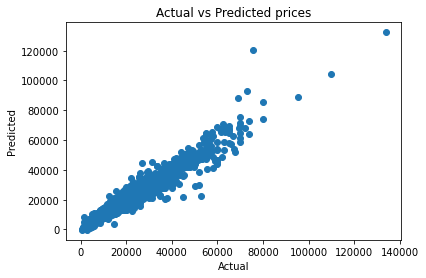

In [45]:
#visual representation of correlation between actual and predicted prices for validation dataset
plt.scatter(y_test_f,y_pred6)
plt.title('Actual vs Predicted prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()